### OLS Task01
#### 쇼핑 고객 데이터

- Customer ID: 고객 아이디
- Gender: 고객의 성별
- Age: 고객의 나이
- Annual Income: 고객의 연소득
- Spending Score: 고객 행동 및 지출 성격에 따라 상점에서 할당한 점수
- Profession: 직업, 전문직
- Work Experience: 고객의 근무 경력(연 단위)
- Family Size: 가족 구성원 수

In [1]:
import pandas as pd

c_df = pd.read_csv('../datasets/customers.csv')
c_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [2]:
# 범주형 데이터, target 데이터 구분
c_df.Profession.value_counts()
c_df.Gender.value_counts()

Gender
Female    1186
Male       814
Name: count, dtype: int64

In [3]:
# 데이터 중복 확인
c_df.duplicated().sum()

0

In [4]:
# 데이터 결측치 확인
c_df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [5]:
# Profession 에 대한 결측치를 확인하였으며 범주형이라 다른 unkown 값을 대체 진행
c_df['Profession'].fillna('Unknown', inplace= True)

In [6]:
c_df.Profession.isna().sum()

0

In [7]:
# 범주형 데이터는 제외하고 copy 및 컬럼 위치 변경
# 범주형: 'Gender','Profession'
# 수치형: 'Age', 'Annual Income ($)', 'Work Experience','Family Size','Spending Score (1-100)'
# 삭제: 'CustomerID'

pre_c_df = c_df[['Age', 'Annual Income ($)', 'Work Experience','Family Size','Spending Score (1-100)']]
pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100)
0,19,15000,1,4,39
1,21,35000,3,3,81
2,20,86000,1,1,6
3,23,59000,0,2,77
4,31,38000,2,6,40
...,...,...,...,...,...
1995,71,184387,8,7,40
1996,91,73158,7,7,32
1997,87,90961,9,2,14
1998,77,182109,7,2,4


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income ($)'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Family Size'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

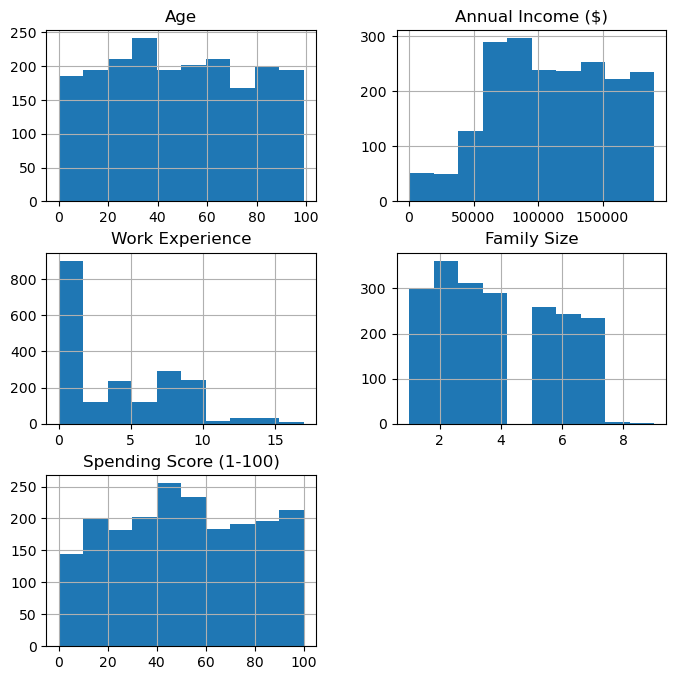

In [8]:
# 분포 확인
pre_c_df.hist(figsize=(8,8))

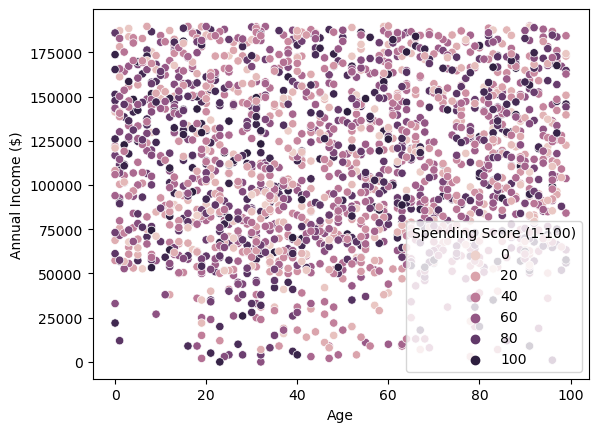

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=pre_c_df['Age'], y=pre_c_df['Annual Income ($)'], hue=pre_c_df['Spending Score (1-100)'])
plt.show()

In [10]:
# 상관관계 확인
pre_c_df.corr()['Spending Score (1-100)'].sort_values(ascending=False)[1:]

Annual Income ($)    0.023299
Family Size          0.002232
Work Experience     -0.028948
Age                 -0.041798
Name: Spending Score (1-100), dtype: float64

<Axes: >

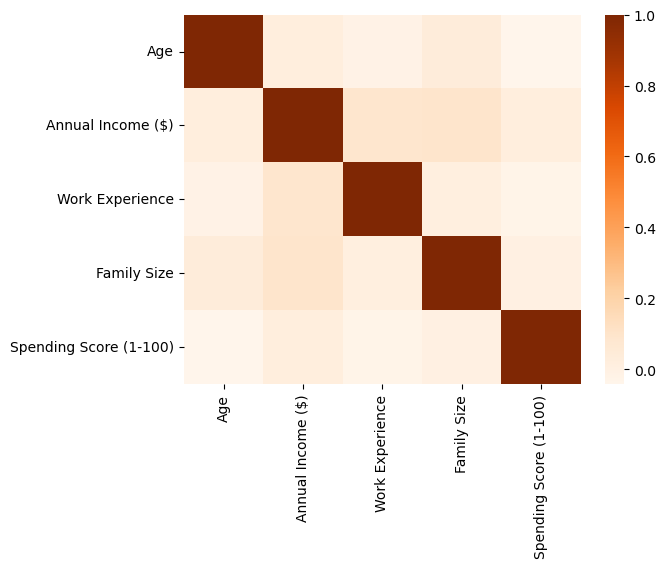

In [11]:
# 히트맵 확인

corr = pre_c_df.corr()
sns.heatmap(corr, cmap='Oranges')



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

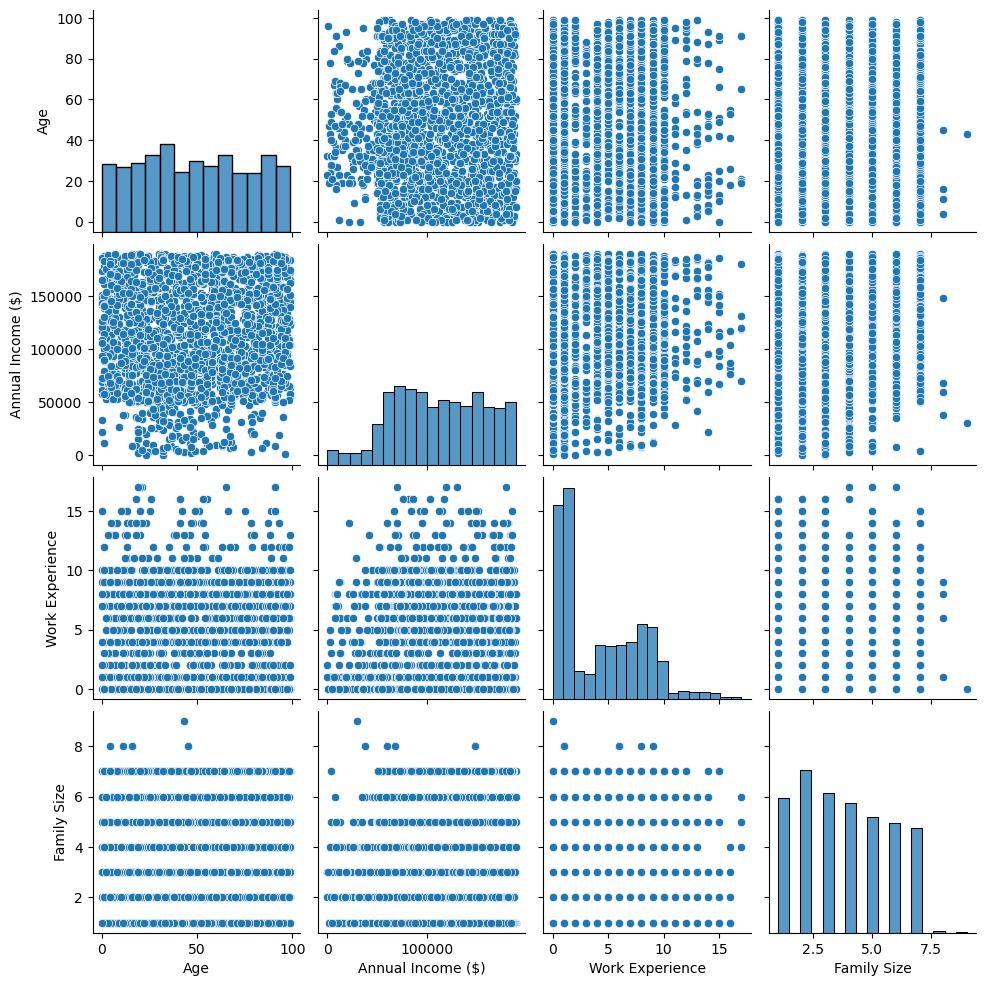

In [12]:
import seaborn as sns

sns.pairplot(pre_c_df.iloc[:, :-1])
plt.show()

In [13]:
# OLS 수치값 확인
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                   OLS Regression Results                                  
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.708
Model:                                OLS   Adj. R-squared (uncentered):              0.708
Method:                     Least Squares   F-statistic:                              1212.
Date:                    Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                            17:33:12   Log-Likelihood:                         -9730.3
No. Observations:                    2000   AIC:                                  1.947e+04
Df Residuals:                        1996   BIC:                                  1.949e+04
Df Model:                               4                                                  
Covariance Type:                nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0

In [14]:
# feature 별 vif score 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [15]:
get_vif(features)

,vif_score,feature
0,3.172253,Age
1,4.533660,Annual Income ($)
2,1.993979,Work Experience
3,3.746431,Family Size


In [16]:
# 범주형 데이터를 추가하여 확인
pre_c_df = pre_c_df.join(c_df[['Gender', 'Profession']])
pre_c_df


,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100),Gender,Profession
0,19,15000,1,4,39,Male,Healthcare
1,21,35000,3,3,81,Male,Engineer
2,20,86000,1,1,6,Female,Engineer
3,23,59000,0,2,77,Female,Lawyer
4,31,38000,2,6,40,Female,Entertainment
...,...,...,...,...,...,...,...
1995,71,184387,8,7,40,Female,Artist
1996,91,73158,7,7,32,Female,Doctor
1997,87,90961,9,2,14,Male,Healthcare
1998,77,182109,7,2,4,Male,Executive


In [17]:
# # 성별의 경우 원-핫 인코딩 사용
# from sklearn.preprocessing import OneHotEncoder
# import numpy as np

# one_hot_encoder = OneHotEncoder(sparse_output=False)
# result = one_hot_encoder.fit_transform(pre_c_df[['Gender']])
# one_hot_encoder.categories_

# pre_c_df = pd.concat([pre_c_df, pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], axis =1)
# pre_c_df

In [18]:
# Prefession , 성별 의 경우 labelencoding 사용
from sklearn.preprocessing import LabelEncoder

columns = ['Gender', 'Profession']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_c_df[column])
    label_encoders[column] = encoder.classes_
    pre_c_df[column] = result

label_encoders

{'Gender': array(['Female', 'Male'], dtype=object),
 'Profession': array(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
        'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'Unknown'],
       dtype=object)}

In [19]:
pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100),Gender,Profession
0,19,15000,1,4,39,1,5
1,21,35000,3,3,81,1,2
2,20,86000,1,1,6,0,2
3,23,59000,0,2,77,0,7
4,31,38000,2,6,40,0,3
...,...,...,...,...,...,...,...
1995,71,184387,8,7,40,0,0
1996,91,73158,7,7,32,0,1
1997,87,90961,9,2,14,1,5
1998,77,182109,7,2,4,1,4


In [20]:
# target 위치 변경 
spending_score = pre_c_df.pop('Spending Score (1-100)')
pre_c_df['target'] = spending_score
pre_c_df


,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,target
0,19,15000,1,4,1,5,39
1,21,35000,3,3,1,2,81
2,20,86000,1,1,0,2,6
3,23,59000,0,2,0,7,77
4,31,38000,2,6,0,3,40
...,...,...,...,...,...,...,...
1995,71,184387,8,7,0,0,40
1996,91,73158,7,7,0,1,32
1997,87,90961,9,2,1,5,14
1998,77,182109,7,2,1,4,4


In [21]:
# OLS 수치값 확인
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.713
Model:                            OLS   Adj. R-squared (uncentered):              0.712
Method:                 Least Squares   F-statistic:                              824.6
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:33:12   Log-Likelihood:                         -9715.3
No. Observations:                2000   AIC:                                  1.944e+04
Df Residuals:                    1994   BIC:                                  1.948e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [22]:
get_vif(features)

,vif_score,feature
0,3.247680,Age
1,4.853215,Annual Income ($)
2,2.010999,Work Experience
3,3.912348,Family Size
4,1.617296,Gender
5,2.078842,Profession


In [23]:
# 수치 값이 서로 독립적이며 해당 내용에 대하여 회귀 분석 진행

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

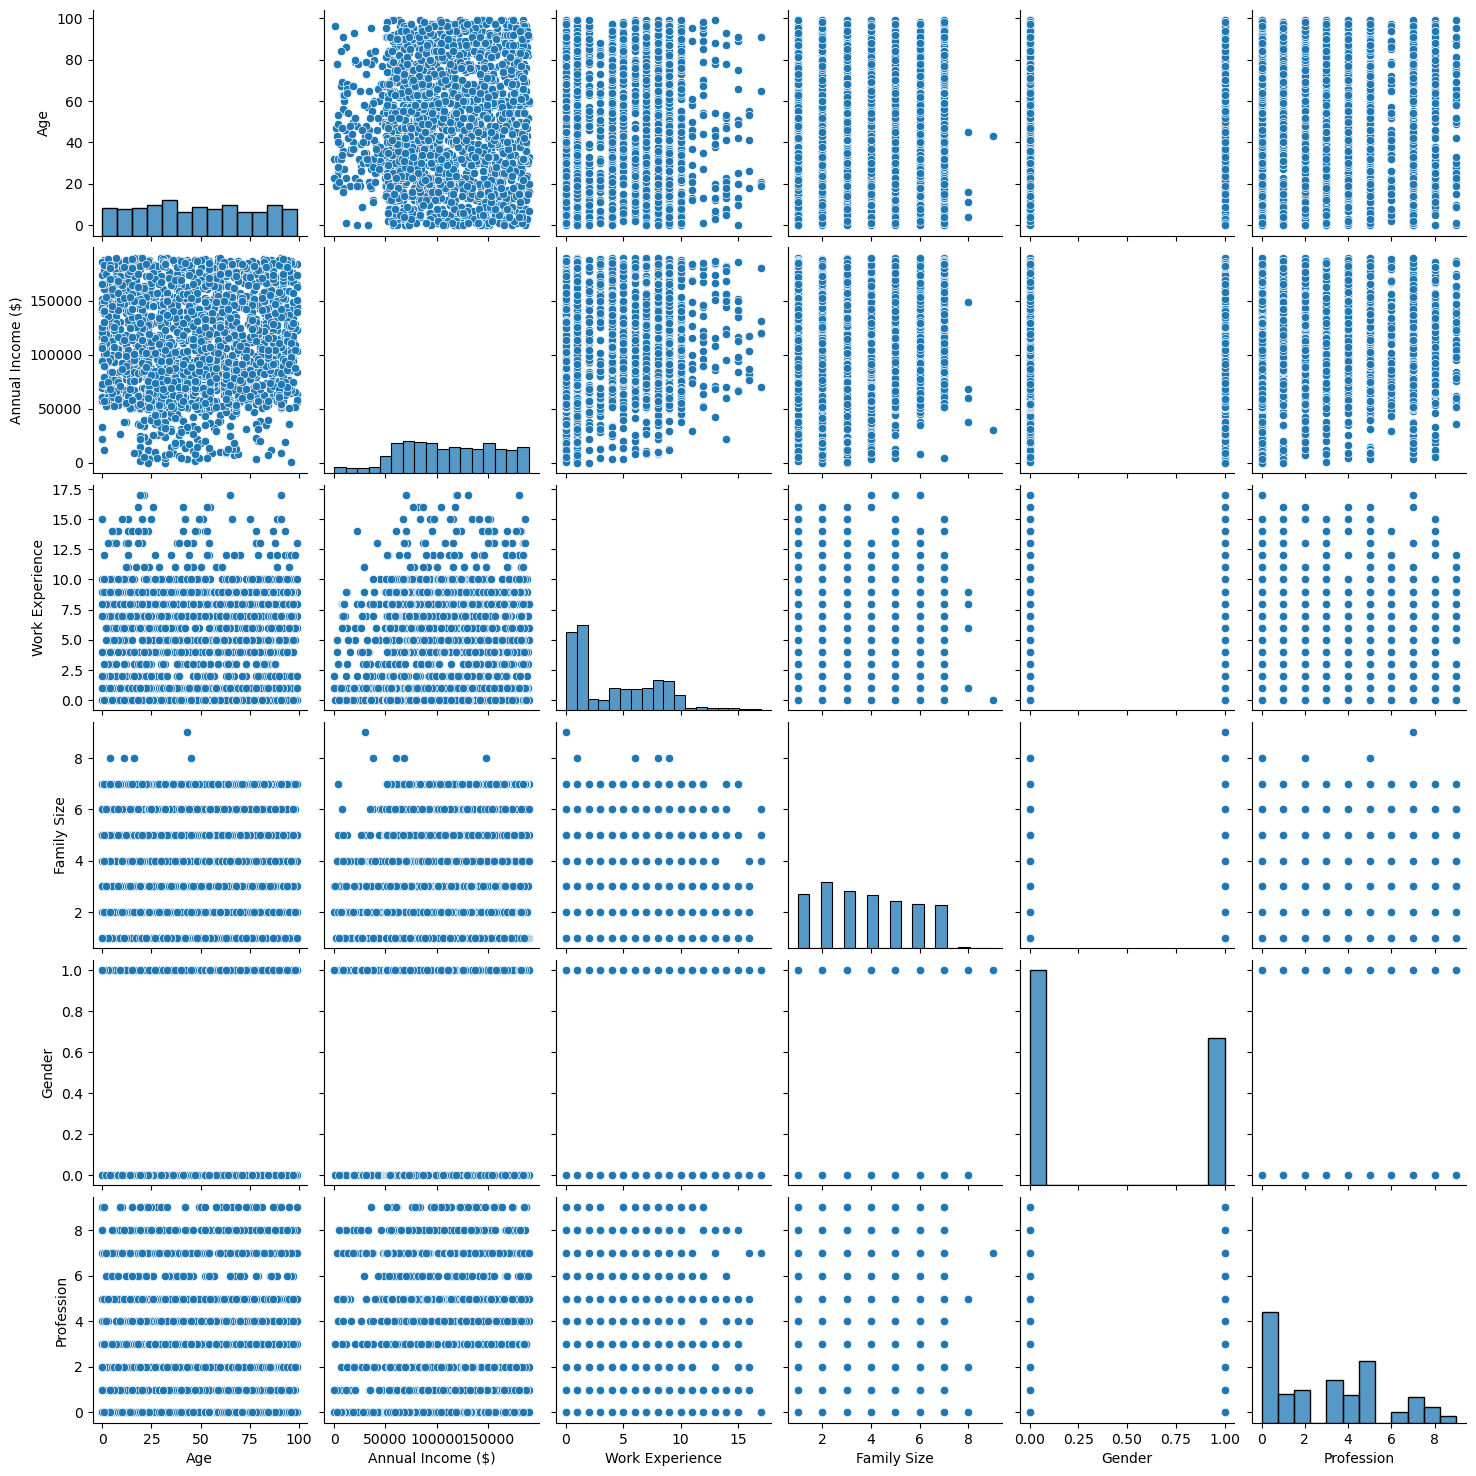

In [24]:
sns.pairplot(pre_c_df.iloc[:, :-1])
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state =124)

l_r = LinearRegression()

In [26]:
l_r.fit(X_train, y_train)

LinearRegression()

In [27]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score
import numpy as np

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [28]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 778.3220, RMSE: 27.8984, MSLE: 0.7092, RMSLE: 0.8421, R2: -0.0046


In [ ]:
# feature importance 확인